In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Base de datos de Australia
#https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
df = pd.read_csv(r"C:\Users\nicole\OneDrive\Documentos\DiplomadoCienciaDatos\Modulo06_RedesNeuronalesProfundas\Proyecto_ModeloLSTM_Lluvia\archive\weatherAUS.csv")
#df.head()

### Preprocesamiento de datos

In [66]:
#df.info()

In [175]:
#Investigando los tipos de datos se puede ver que hay columnas con datos de tipo object
#Hay que transformarlas de manera que sirvan para el análisis

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df['WindGustDir'] = df['WindGustDir'].map({'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
'SSW': 8, 'SW': 9, 'WSW': 10, 'W': 11, 'WNW': 12, 'NW': 13, 'NNW': 14})
df['WindDir9am'] = df['WindDir9am'].map({'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
'SSW': 8, 'SW': 9, 'WSW': 10, 'W': 11, 'WNW': 12, 'NW': 13, 'NNW': 14})
df['WindDir3pm'] = df['WindDir3pm'].map({'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
'SSW': 8, 'SW': 9, 'WSW': 10, 'W': 11, 'WNW': 12, 'NW': 13, 'NNW': 14})

df.drop(columns=['Location','WindGustDir', 'WindGustSpeed', 'WindDir9am','WindDir3pm', 'Evaporation', 'Sunshine'], inplace=True)
df.dropna(inplace=True)
df.head()



,Date,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2008-12-05,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
11,2008-12-12,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1.0,1.0
12,2008-12-13,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1.0,1.0
16,2008-12-17,14.1,20.9,0.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0.0,1.0
17,2008-12-18,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,1.0,1.0


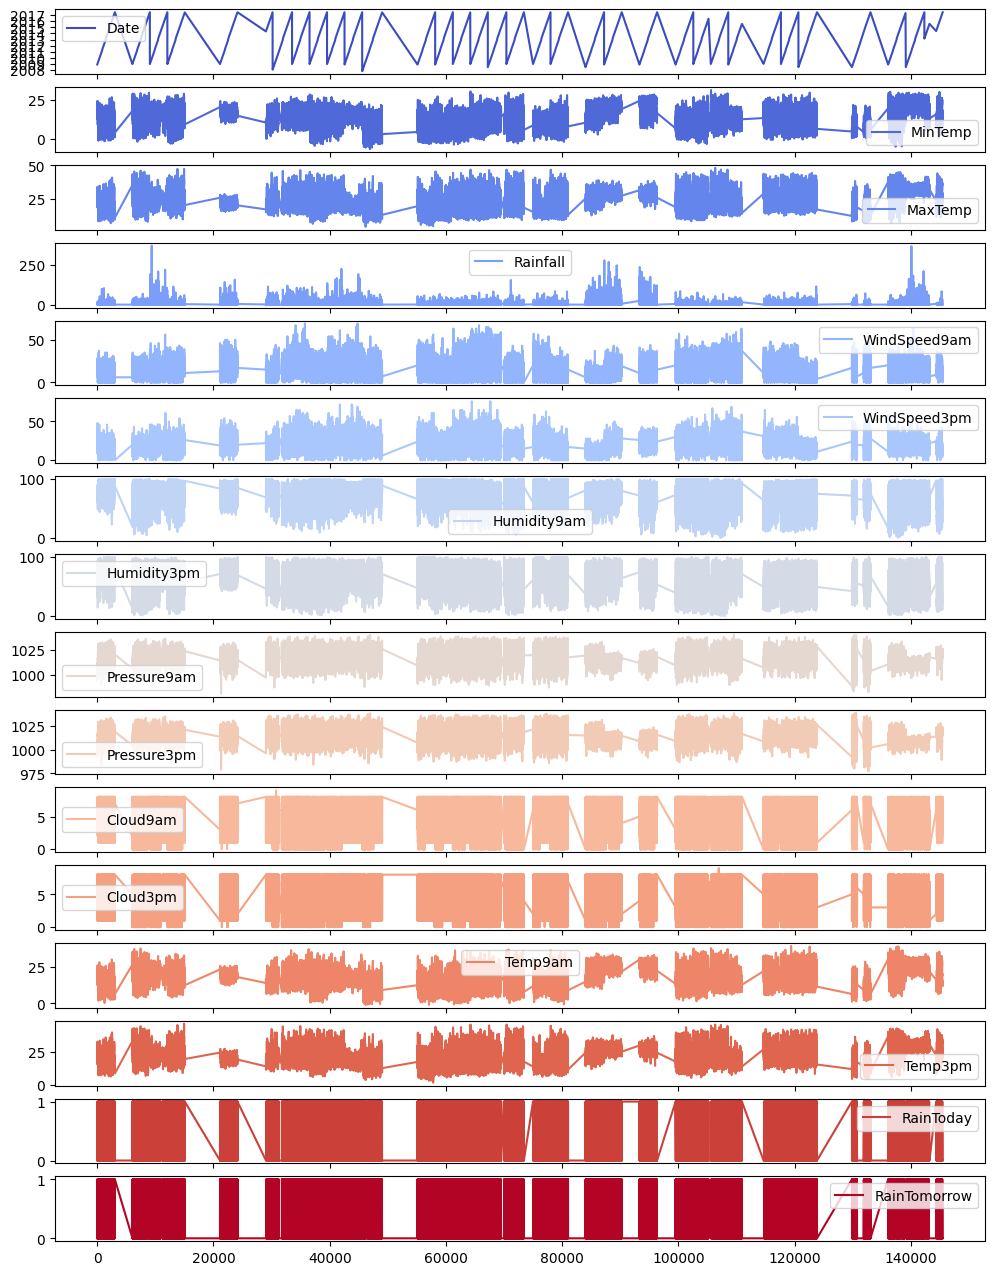

In [176]:
# Opción recomendada
df = df.sort_index()

# Visualizamos el comportamiento de todas las variables a través del tiempo
columns = df.columns
num_var = df.shape[0]
plots = df[columns][0:num_var]
plots.index = df.index[0:num_var]
_ = plots.plot(subplots=True, figsize=(12,16), cmap='coolwarm')

df.set_index("Date", inplace=True)
#df["Year"] = df.index.year
df["Month"] = df.index.month
#df["Day"] = df.index.day
#df["Weekday"] = df.index.weekday  # 0 = lunes, 6 = domingo




In [177]:
from sklearn.preprocessing import MinMaxScaler
#Normalizar los datos
features = ['MinTemp', 'MaxTemp', 'Rainfall','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
scaler = MinMaxScaler()

df[features] = scaler.fit_transform(df[features])

df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
Date,,,,,,,,,,,,,,,,
2008-12-05,0.635171,0.640909,0.002695,0.101449,0.263158,0.82,0.33,0.501656,0.467638,0.777778,0.888889,0.465347,0.622222,0.0,0.0,12
2008-12-12,0.593176,0.400000,0.005930,0.217391,0.171053,0.89,0.91,0.496689,0.438511,0.888889,0.888889,0.418317,0.340000,1.0,1.0,12
2008-12-13,0.593176,0.329545,0.042049,0.405797,0.368421,0.76,0.93,0.228477,0.257282,0.888889,0.888889,0.455446,0.313333,1.0,1.0,12
2008-12-17,0.545932,0.381818,0.000000,0.159420,0.118421,0.69,0.82,0.524834,0.538835,0.888889,0.111111,0.450495,0.364444,0.0,1.0,12
2008-12-18,0.530184,0.427273,0.045283,0.086957,0.263158,0.80,0.65,0.418874,0.406149,0.888889,0.111111,0.470297,0.440000,1.0,1.0,12


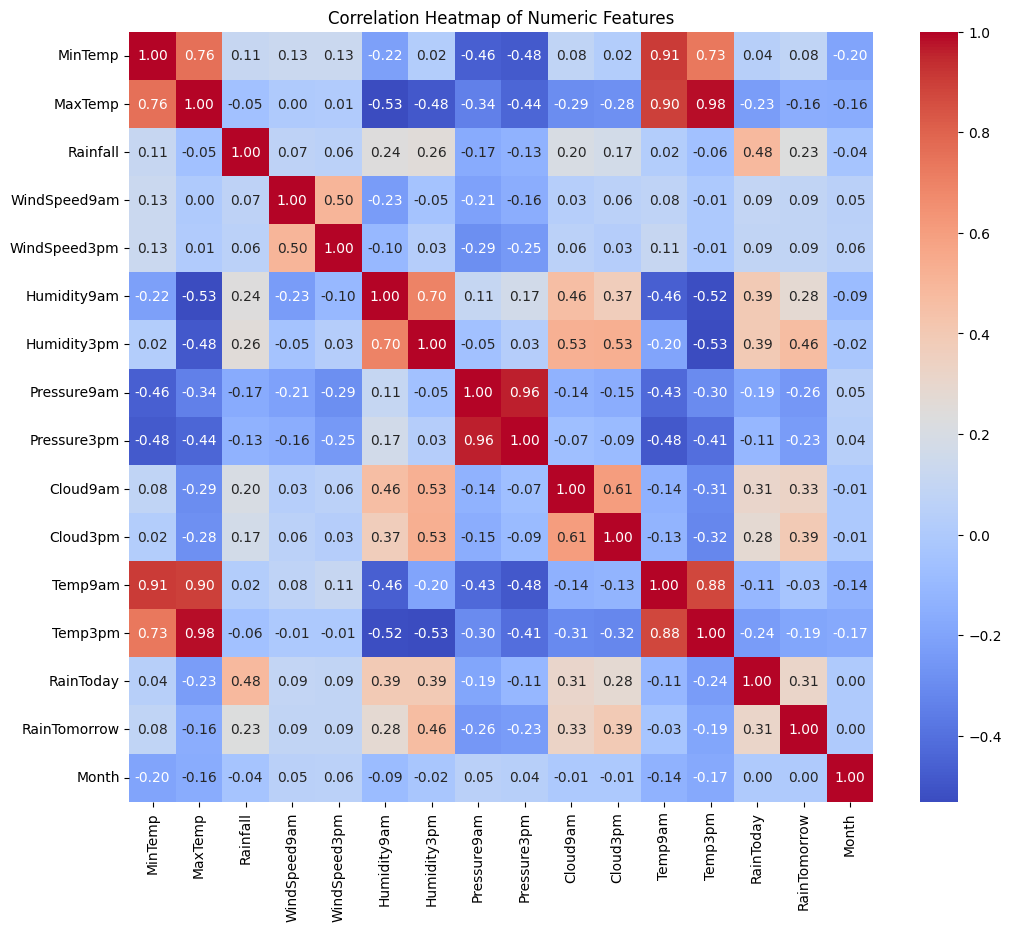

In [178]:
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

In [180]:
#Eliminamos las columnas con mayor correlación

# Crear un conjunto para almacenar las columnas a eliminar
columns_to_drop = set()

# Establecer un umbral de correlación
threshold = 0.9

# Identificar columnas correlacionadas
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[j]
            columns_to_drop.add(colname)

# Eliminar columnas altamente correlacionadas
df_cleaned = df.drop(columns=columns_to_drop)

print("Columnas eliminadas:", columns_to_drop)

Columnas eliminadas: {'Temp9am', 'Temp3pm', 'Pressure3pm'}


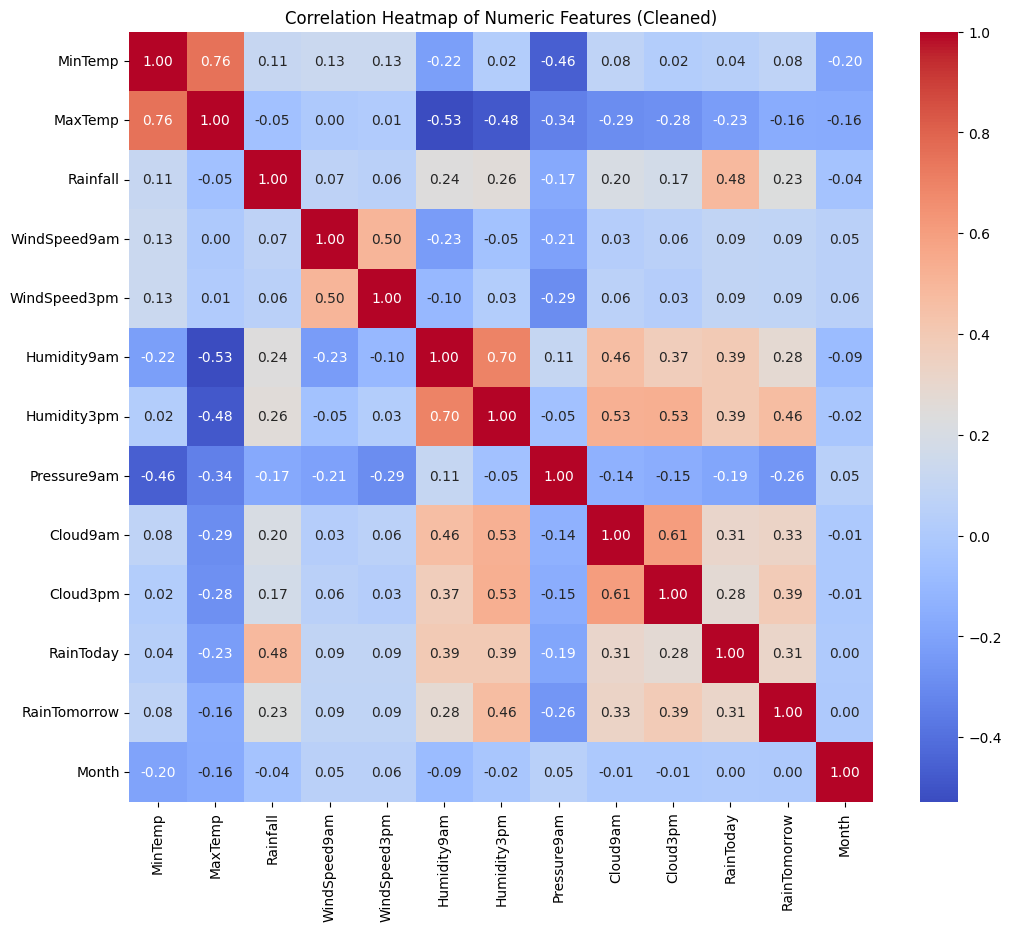

In [181]:
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])
if numeric_df_cleaned.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr_matrix_cleaned = numeric_df_cleaned.corr()
    sns.heatmap(corr_matrix_cleaned, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features (Cleaned)')
    plt.show()

In [ ]:
#sns.pairplot(df_cleaned, diag_kind='kde', hue='RainTomorrow', palette='Set1')
#plt.show()

### División de datos

In [182]:
#Párametros
data = numeric_df_cleaned.drop(columns=['RainTomorrow'])
targets = numeric_df_cleaned['RainTomorrow']

sequence_length = 30
delay = 10
batch_size = 34
num_samples = len(data)
num_train_samples = int(num_samples * 0.7)
num_val_samples = int(num_samples * 0.15)
num_test_samples = num_samples - (num_train_samples + num_val_samples)

X_train = data[:num_train_samples - delay]
y_train = targets[:num_train_samples]

X_val = data[num_train_samples : num_train_samples + num_val_samples - delay]
y_val = targets[num_train_samples : num_train_samples + num_val_samples]

X_test = data[num_train_samples + num_val_samples : -delay]
y_test = targets[num_train_samples + num_val_samples:]

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data = X_train,
    targets = y_train,
    sequence_length = sequence_length,
    batch_size = batch_size
)
val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data = X_val,
    targets = y_val,
    sequence_length = sequence_length,
    batch_size = batch_size
)
test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data = X_test,
    targets = y_test,
    sequence_length = sequence_length,
    batch_size = batch_size
)

#print(num_train_samples)
#print(num_val_samples)
#print(num_test_samples)

### Creación del modelo

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

num_rows, num_features = data.shape

def create_model():
    model = Sequential([
        LSTM(64,input_shape = (sequence_length, num_features), return_sequences = False),
        Dropout(0.3),
        Dense(1, activation = 'sigmoid')
    ])
    return model

model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = 'binary_crossentropy')

C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Entrenamiento del modelo

In [184]:
epochs = 15

history = model.fit(
    train_dataset, 
    epochs = epochs,
    batch_size = batch_size,   
    validation_data = val_dataset,
    verbose = 1,
    shuffle = False
)

Epoch 1/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.5628 - val_loss: 0.4979
Epoch 2/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.5607 - val_loss: 0.4904
Epoch 3/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.4051 - val_loss: 0.1134
Epoch 4/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.1941 - val_loss: 0.1135
Epoch 5/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1911 - val_loss: 0.1067
Epoch 6/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1737 - val_loss: 0.1077
Epoch 7/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1728 - val_loss: 0.1140
Epoch 8/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.1608 - val_loss: 0.1079
Epoch 9/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.1637 - val_loss: 0.1113
Epoch 10/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.1609 - val_loss: 0.1020
Epoch 11/15
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.1576 - val_loss: 0.0960
Epoch 12/15
1592/

### Evaluación del modelo

11569
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


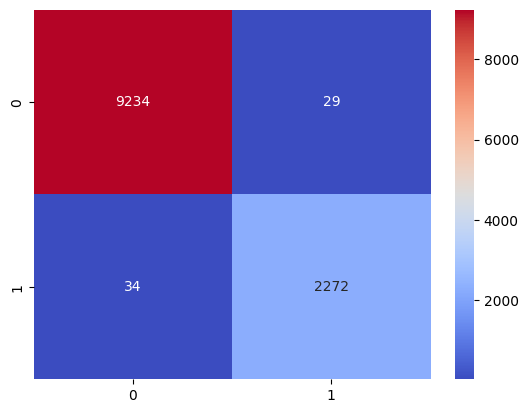

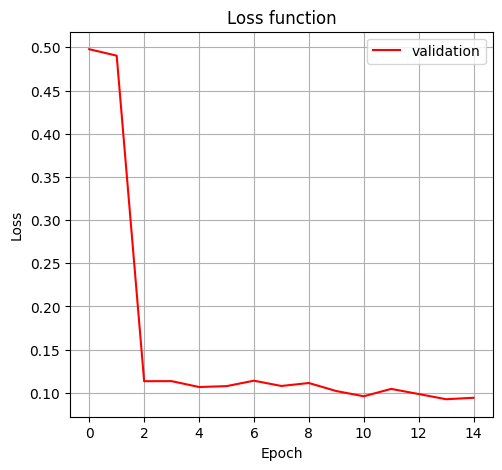

Loss: 0.15672069688638052


In [188]:
#Obtenemos las etiquetas de entrenamiento reales
y_targets = []

for batch in test_dataset:
    X, y = batch
    y_targets.append(y)

y_targets = np.concatenate(y_targets, axis=0)
print(len(y_targets))

#Obtenemos las etiquetas de predicción
probabilities = model.predict(test_dataset)

final_odds = []

for probability in probabilities:
    if probability > 0.5:
        final_odds.append(1)
    elif probability <= 0.5:
        final_odds.append(0)
    else:
        print('Outside the probability range')


#Comparamos los resultados de las predicciones con 
#las etiquetas reales en una matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_targets, final_odds)
sns.heatmap(cm, fmt = 'g', annot= True, cmap='coolwarm')
cm

#Gráfica de la fnción de perdida
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], color= 'red', label = 'validation')
plt.title('Loss function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

print(f"Loss: {sum(history.history['val_loss']) / len(history.history['val_loss'])}")